## Importance of feature selection

#### If we take into consideration too may features it will lead to generalized model or may result into overfitting. But if we take very less no. of features we will get a underfitted model or a model which will not be efficient to use further opn new data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv('IRIS.csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris_data.shape

(150, 5)

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [17]:
iris_data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

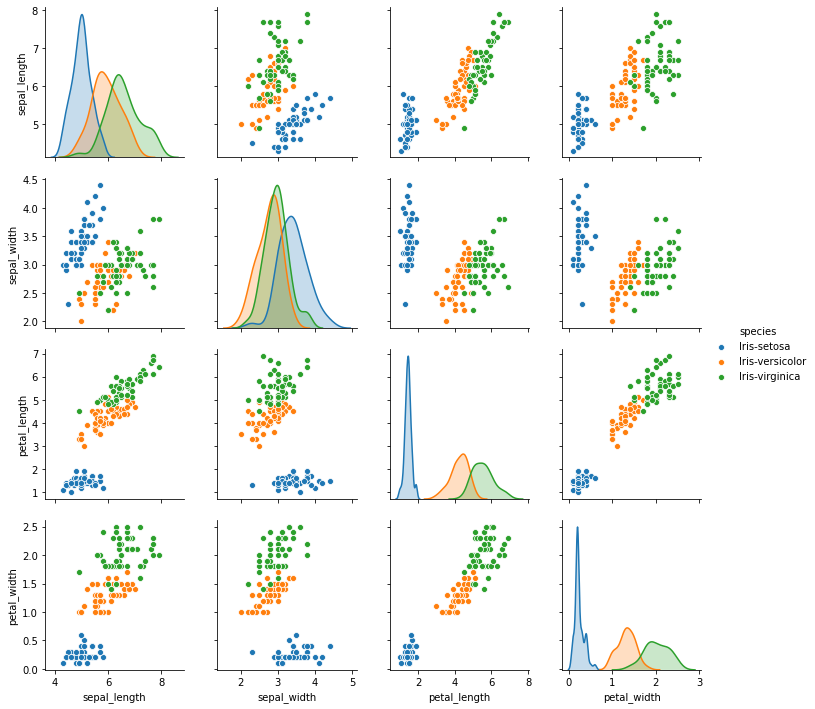

In [18]:
sns.pairplot(iris_data, hue = 'species')

Petal length and width can act as distinctive feature out of all to classify the unknown

## to select the best two features

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
X = iris_data.iloc[:, 0:4].values
y = iris_data.iloc[:, -1].values

In [28]:
bestf = SelectKBest(score_func = chi2, k =2)
fitf = bestf.fit(X,y)

In [54]:
dfscore = pd.DataFrame(fitf.scores_)
dfcolumns = pd.DataFrame(iris_data.columns[0:4])
con = pd.concat([dfcolumns, dfscore], axis = 1)
con.columns = ['Specs','Score']  #naming the dataframe columns
print(con.nlargest(4,'Score'))


          Specs       Score
2  petal_length  116.169847
3   petal_width   67.244828
0  sepal_length   10.817821
1   sepal_width    3.594499


## visualization of the best features

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
fitm = model.fit(X,y)
print(fitm.feature_importances_)


[0.07632562 0.02825968 0.47027034 0.42514435]


C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


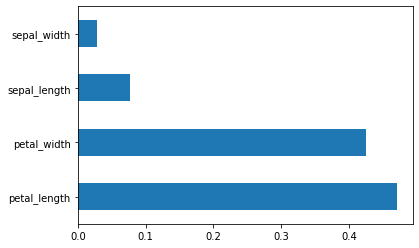

In [52]:
feat_importances = pd.Series(fitm.feature_importances_, index= iris_data.columns[0:4])
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

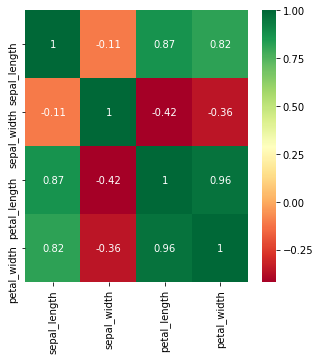

In [58]:
corrmat = iris_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(iris_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [84]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
features = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = iris['species']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 1)

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pred = model.predict(X_test)

In [96]:
from sklearn.metrics import classification_report
result = classification_report(pred, y_test)

In [97]:
print(result)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.72      1.00      0.84        13
 Iris-virginica       1.00      0.72      0.84        18

       accuracy                           0.89        45
      macro avg       0.91      0.91      0.89        45
   weighted avg       0.92      0.89      0.89        45



In [99]:
bestf = iris[['petal_length', 'petal_width']]
target = iris['species']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestf, target, test_size = 0.30, random_state = 1)

In [101]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ojaswi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
pred1 = model1.predict(X_test)

In [103]:
from sklearn.metrics import classification_report
result1 = classification_report(pred1, y_test)

In [105]:
print(result1, result)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.28      1.00      0.43         5
 Iris-virginica       1.00      0.50      0.67        26

       accuracy                           0.71        45
      macro avg       0.76      0.83      0.70        45
   weighted avg       0.92      0.71      0.74        45
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.72      1.00      0.84        13
 Iris-virginica       1.00      0.72      0.84        18

       accuracy                           0.89        45
      macro avg       0.91      0.91      0.89        45
   weighted avg       0.92      0.89      0.89        45



If we compare our results we can clearly see that although the petal length and width were important features but ignoring others leads to low model accuracy. This happens in this case as the number of features are already very low and skipping any one will give variations in the result.


Moreover in pairplot we have seen good corelation among petal length and width with sepal length and sepal width. Therefore skipping them